# Crash Carts
## PH 211 Lab
### Feb 07, 2021
### Zachary Bochanski

This lab uses data to describe how a simulated mobile student moves down a hallway. The idea is to plan for, the moving objects involved, to pass within close proximiety (1m) to each other and not collide. The carts are inteded to move at different constant velocitys with an acceptable, and planned margin of error.

### Imports

Importing packages `numpy` and `matplotlib` for use within the lab.

In [118]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as patch

### Simulated data sets
To keep things simple, sticking with group 1.

- Slow data: `group1`
- Fast data: `group1`

Hallway information:
- Hallway1: `6m` from intersection 
- Hallway2: `9m` from intersection 

In [119]:
# Slow data group 1
slow_data = [0.94, 1.02, 0.92, 0.41, 1.23, 0.29] 

# Fast data group 1
fast_data = [2.49, 2.73, 1.96, 2.37, 1.52, 1.85]

### Data characteristics

From each data set we'll calculate mean, standard deviation, and the relationship between the two as a ratio which can help us determine the variability.

Quick rundown:

- mean: average of all data points
- standard deviation: average distance from the mean
- std / mean = ratio between the two... important because perharps a lower std (closer to the mean) is not actually less variable.

This point is illustrated by the data below, where the *slow* std is lower than the *fast* std which would indicate that the slow measurments are more percise. But when the variance is calculated it is noted that the *slow* data has a way more difference between data points than the *fast* data. 



In [120]:
# Characteristics of slow data
slow_mean = np.mean(slow_data)
slow_sigma = np.std(slow_data)
slow_var = 100.*slow_sigma/slow_mean

# Characteristics of fast data
fast_mean = np.mean(fast_data)
fast_sigma = np.std(fast_data)
fast_var = 100.*fast_sigma/fast_mean


# Print data
print("-- SLOW --")
print("Average slow speed is %.3f m/s with a standard deviation of %.3f." % (slow_mean,slow_sigma))
print("Variability is %.2f%%" % slow_var)
print("-- FAST --")
print("Average fast speed is %.3f m/s with a standard deviation of %.3f." % (fast_mean,fast_sigma))
print("Variability is %.2f%%" % fast_var)

-- SLOW --
Average slow speed is 0.802 m/s with a standard deviation of 0.337.
Variability is 41.98%
-- FAST --
Average fast speed is 2.153 m/s with a standard deviation of 0.413.
Variability is 19.18%


### Model the Cart

The model is described by a function that best fits the behavior of the carts position over time.   
- The behavior of the cart can be modeled with something like:

$$ x_{cart} = x_0 + v_{cart}\:  t$$

In other words the position of the cart is equal to the initioal position plus the velocity muiltiplied by time.

- numpy.linespace() can be used for creating time (t) values.


In [121]:
# Seting range of time
model_time = np.linspace(0.,12.,20) # linspace(initial, max, increments)

# Model parameters
model_slow = slow_mean
model_slow_initial = 0

# Generate position (x) value for model
model_slow_x = model_slow_initial + model_slow*model_time

### Plot the model

Plotting the model of the cart from the equation we created in the previous cell.

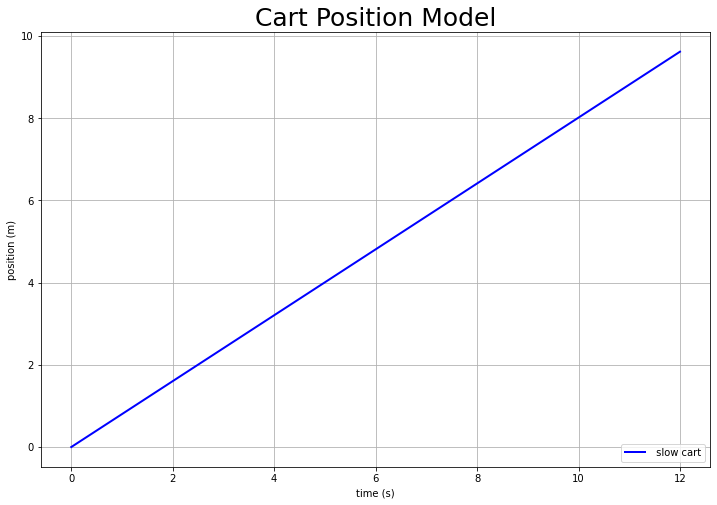

In [122]:
fig1, ax1 = plt.subplots()

# Plot object
ax1.plot(model_time, model_slow_x, color = 'blue', linestyle = '-', linewidth = 2., label = " slow cart")

# Plot labels
plt.xlabel('time (s)', fontsize = 10)
plt.ylabel('position (m)', fontsize = 10)
plt.title('Cart Position Model', fontsize = 25)

# Plot configuration
ax1.grid()
fig1.set_size_inches(12, 8)
plt.legend(loc= 4)
plt.show()

#### Cart front and back considerations

Some condiderations are to include the exact position of the front and back of the cart as well. They can be added to the plot as lines parallel to the "center" of the cart.

In [123]:
# The total space the cart occupies: by finding cart width
cart_length = .6
front_offset = cart_length/2.
back_offset = cart_length/2.

# Location of front and back edges, just changing the distance initial
front_slow_x = (model_slow_initial + front_offset) + model_slow*model_time
back_slow_x = (model_slow_initial - back_offset) + model_slow*model_time

#### New position plot including the front and rear positions



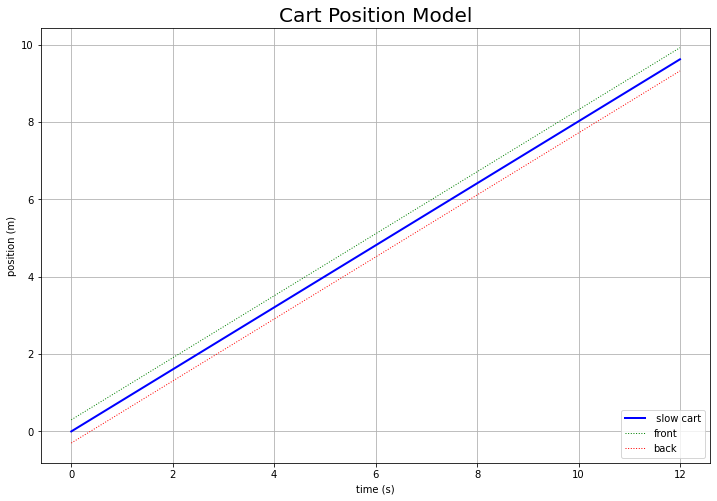

In [124]:
fig2, ax2 = plt.subplots()

ax2.plot(model_time, model_slow_x, color = 'blue', linestyle = '-', linewidth = 2., label = " slow cart")
ax2.plot(model_time, front_slow_x, color = 'green', linestyle = ':', linewidth = 1., label = "front")
ax2.plot(model_time, back_slow_x, color = 'red', linestyle = ':', linewidth = 1., label = "back")

# Labels
plt.xlabel('time (s)', fontsize = 10)
plt.ylabel('position (m)', fontsize = 10)
plt.title('Cart Position Model', fontsize = 20)

ax2.grid()
fig2.set_size_inches(12, 8)
plt.legend(loc= 4)
plt.show()

### Improve the Cart Model

Right now we have the center, front edge, and back edge of the cart graphed asuming a constant velocity which gives us these nice lines. A concern would be how does the variability in the velecoity affect the actual position of the front and rear edge of the cart.

The following block of code incorporates the standard deviation into the mean as a function of velocity. So we're adding the deviation to the front to captures those "fast" front edges of the cart, and we're subtracting that deviation from the rear of the "slow" cart rear edges. This gives us a little bit more of a buffer to avoid a collision. On the model its shown by a greater velocity slope for the front edge of "fast carts" and a lesser velocity slope for the rear edge of "slow carts."

The reason the front edge of the cart and rear edge appear to be farther appart in distance (spread apart) is because faster carts front's are farther ahead (greater distance) and the slower carts rear edges are farther behind (cover less distance) and as time goes on these gaps get larger and larger. This is modeled by a line with a greater slope and a line with a less agressive slope.

The refactored equations is in the code block below following is the new model.

In [125]:
# Faster front, slower rear
front_slow_fast = slow_mean + slow_sigma 
back_slow_slow = slow_mean - slow_sigma 

# Location of edges
frontSFX = (model_slow_initial + front_offset) + front_slow_fast*model_time
backSSX = (model_slow_initial - back_offset) + back_slow_slow*model_time

### Cart Model Revised

This next version of the model accounts for the average fastest cart's leading edge and the average slowest cart's trailing edge.

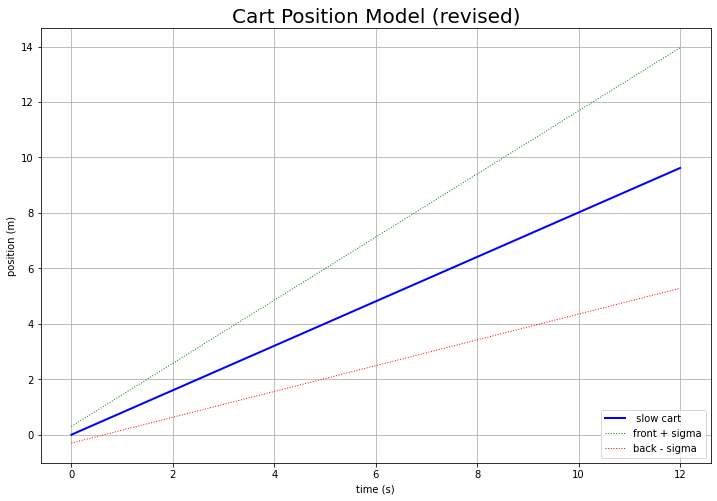

In [126]:
fig3, ax3 = plt.subplots()

ax3.plot(model_time, model_slow_x, color = 'blue', linestyle = '-', linewidth = 2., label = " slow cart")
ax3.plot(model_time, frontSFX, color = 'green', linestyle = ':', linewidth = 1., label = "front + sigma")
ax3.plot(model_time, backSSX, color = 'red', linestyle = ':', linewidth = 1., label = "back - sigma")

# Labels
plt.xlabel('time (s)', fontsize = 10)
plt.ylabel('position (m)', fontsize = 10)
plt.title('Cart Position Model (revised)', fontsize = 20)

ax3.grid()
fig3.set_size_inches(12, 8)
plt.legend(loc= 4)
plt.show()

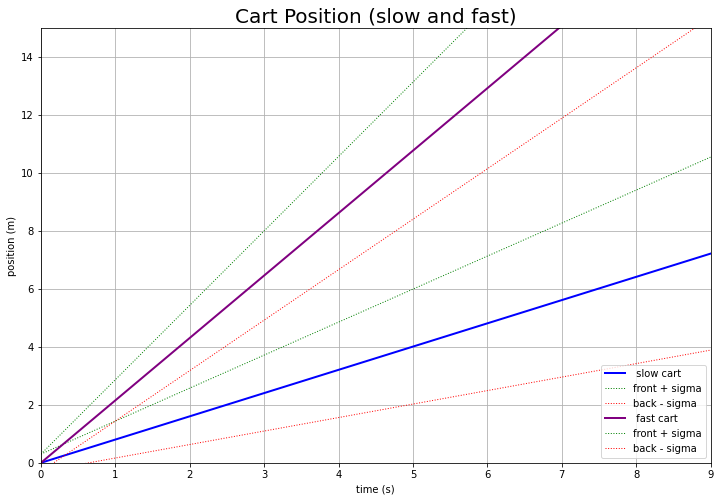

In [107]:
# Fast cart model setup
model_fast = fast_mean
model_fast_initial = 0.

# Equation for model, position values
model_fast_x = model_fast_initial + model_fast*model_time

# Calculate front and rear edge speed (will be slope) based on STD
front_fast_fast = fast_mean + fast_sigma 
back_fast_slow = fast_mean - fast_sigma 

# Location of edges
frontFFX = (model_fast_initial + front_offset) + front_fast_fast*model_time
backFSX = (model_fast_initial - back_offset) + back_fast_slow*model_time

# Plot object
fig4, ax4 = plt.subplots()

# Slow cart
ax4.plot(model_time, model_slow_x, color = 'blue', linestyle = '-', linewidth = 2., label = " slow cart")
ax4.plot(model_time, frontSFX, color = 'green', linestyle = ':', linewidth = 1., label = "front + sigma")
ax4.plot(model_time, backSSX, color = 'red', linestyle = ':', linewidth = 1., label = "back - sigma")

# Fast cart
ax4.plot(model_time, model_fast_x, color = 'purple', linestyle = '-', linewidth = 2., label = " fast cart")
ax4.plot(model_time, frontFFX, color = 'green', linestyle = ':', linewidth = 1., label = "front + sigma")
ax4.plot(model_time, backFSX, color = 'red', linestyle = ':', linewidth = 1., label = "back - sigma")

# Labels
plt.xlabel('time (s)', fontsize = 10)
plt.ylabel('position (m)', fontsize = 10)
plt.title('Cart Position (slow and fast)', fontsize = 20)

# Plot parameters
plt.xlim([0, 9])
plt.ylim([0, 15])

ax4.grid()
fig4.set_size_inches(12, 8)
plt.legend(loc= 4)
plt.show()

### Put Model to Work

Now that a decent model of the slow and fast cart has been created based on the collected data it's time to put it to work.

To do this the first step is laying laying out both the slow and fast carts in a way to determine the start time. This is accomplished shifting the velocity line in terms of time (t) to the left and right using a variable called `wait_time`

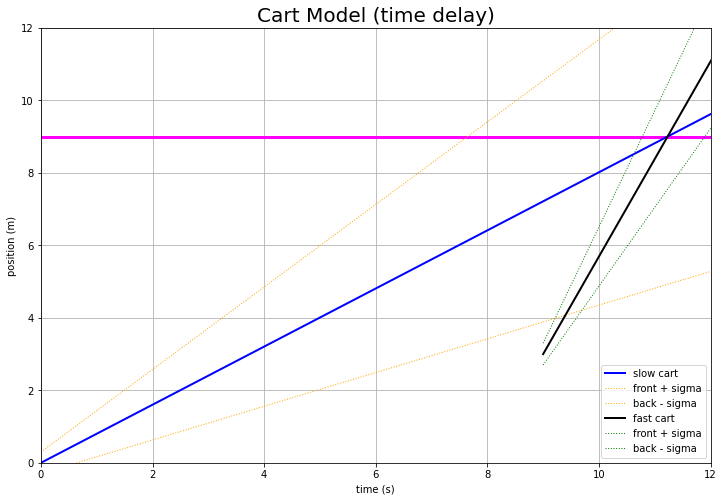

In [129]:
# Fast cart delay
wait_time = 9 # seconds
hall_long = 9 # distance from start meters
hall_short = 6
hall_diff = hall_long - hall_short

# Plot obj
fig5, ax5 = plt.subplots()

# Slow cart
ax5.plot(model_time, model_slow_x, color = 'blue', linestyle = '-', linewidth = 2., label = "slow cart")
ax5.plot(model_time, frontSFX, color = 'orange', linestyle = ':', linewidth = 1., label = "front + sigma")
ax5.plot(model_time, backSSX, color = 'orange', linestyle = ':', linewidth = 1., label = "back - sigma")

# Fast cart
ax5.plot(model_time + wait_time, model_fast_x + hall_diff, color = 'black', linestyle = '-', linewidth = 2., label = "fast cart")
ax5.plot(model_time + wait_time, frontFFX + hall_diff, color = 'green', linestyle = ':', linewidth = 1., label = "front + sigma")
ax5.plot(model_time + wait_time, backFSX + hall_diff, color = 'green', linestyle = ':', linewidth = 1., label = "back - sigma")

# Long hallway distance
ax5.hlines(hall_long, 0., 12, color = 'magenta', linestyle = '-', linewidth = 3.)

# Labels
plt.xlabel('time (s)', fontsize = 10)
plt.ylabel('position (m)', fontsize = 10)
plt.title('Cart Model (time delay)', fontsize = 20)

# Range and Domain
plt.xlim([0, 12])
plt.ylim([0, 12])

ax5.grid()
fig5.set_size_inches(12, 8)
plt.legend(loc= 4)
plt.show()

### Information from model

The representation above shows the total distance each cart moved and how long it took for the cart to move that distance.

- The `blue` line represents the slow cart which took (11s) to move 9m down the long hallway.
- The `black` line represents the fast cart which took (2s) to move 6m meters down the short hallway.

The fast cart is delayed for `9 seconds` so both carts reach the same exact location of (9m) at `11 seconds`

Next we'll just adjust the delay time to account for a **1 meter** gap between the moving carts.
- The plot below shows the delay adjusted for both carts to pass within 1 meter.

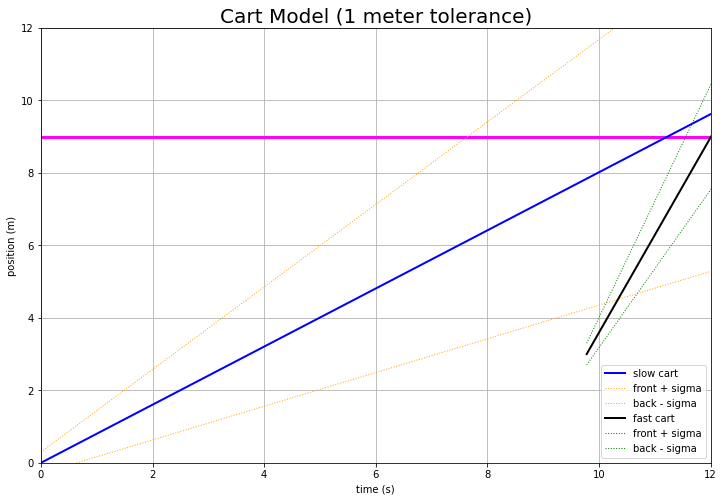

In [135]:
# Fast cart delay
wait_time = 9.78 # seconds
hall_long = 9 # distance from start meters
hall_short = 6
hall_diff = hall_long - hall_short

# Plot obj
fig5, ax5 = plt.subplots()

# Slow cart
ax5.plot(model_time, model_slow_x, color = 'blue', linestyle = '-', linewidth = 2., label = "slow cart")
ax5.plot(model_time, frontSFX, color = 'orange', linestyle = ':', linewidth = 1., label = "front + sigma")
ax5.plot(model_time, backSSX, color = 'orange', linestyle = ':', linewidth = 1., label = "back - sigma")

# Fast cart
ax5.plot(model_time + wait_time, model_fast_x + hall_diff, color = 'black', linestyle = '-', linewidth = 2., label = "fast cart")
ax5.plot(model_time + wait_time, frontFFX + hall_diff, color = 'green', linestyle = ':', linewidth = 1., label = "front + sigma")
ax5.plot(model_time + wait_time, backFSX + hall_diff, color = 'green', linestyle = ':', linewidth = 1., label = "back - sigma")

# Long hallway distance
ax5.hlines(hall_long, 0., 12, color = 'magenta', linestyle = '-', linewidth = 3.)

# Labels
plt.xlabel('time (s)', fontsize = 10)
plt.ylabel('position (m)', fontsize = 10)
plt.title('Cart Model (1 meter tolerance)', fontsize = 20)

# Range and Domain
plt.xlim([0, 12])
plt.ylim([0, 12])

ax5.grid()
fig5.set_size_inches(12, 8)
plt.legend(loc= 4)
plt.show()

### Cart model with 1 meter tolerance

The variability of the potential collisions from estimated from the data is fairly large so there is a good chance of the carts colliding and seemingly import that there is an "abort" procedure! The rear edge of the slow cart is well withing the range of the 1 meter gap that the fast cart allows when passing the 9m mark. To be safe we could delay the start of the fast cart even more until it's outside the varibility of the slow cart but what's the fun in that!?

The slow cart still travels the 9m in 11s while the fast cart is delayed by a little under a second more for the fast cart to pass within 1 meter of the slow cart. This bring the total delay time to:

- 9 second and 3/4 second or 750 milisecond delay before starting the fast cart.

### Reflection

I can see how this lab would be really fun in person, it's honstly fun doing it "in the mind" and a cool exercise in visualization. I think jupyter lab is the most fun part of all these labs. It seems like simple things like lines and "simpler" concepts are definetly more challenging in a coding environment, but I definetly know the long term gain is worth the struggle with the code and it's pretty cool finding ways to "break" down the code and work on ways to think differently. Online Covid-19 protocols are almost a blessing in disguise as it forces us to be extra creative and "imagine" what's going on. I guess I don't know how to compare it to an in-person physics lab but I find it to be very rewarding after completing each of these lab simulations, I appriciate the way they are set up to make us think about what is going on and in turn figure out things that I know will "stick" with me.